# **Text Representation Methods BoW, N-grams, Word2Vec, TF-IDF**

#  Text Representation Methods (BoW, N-grams, Word2Vec, TF-IDF)

This document outlines the step-by-step pipeline implemented in the notebook for transforming raw text data into numerical formats suitable for machine learning, focusing on Bag of Words (BoW), N-grams, Word2Vec, and TF-IDF.

## 1. Data Loading and Initial Inspection

**Pipeline Step**: The first step involved loading the `spam.csv` dataset and performing an initial inspection.

*   **Code Reference**: `d01d6ac1`
*   **Details**: The dataset (`spam.csv`) was loaded into a Pandas DataFrame (`df`). We examined the first few rows (`df.head()`), column names (`df.columns`), and a concise summary (`df.info()`). We also checked for missing values (`df.isnull().sum()`), noting that columns `Unnamed: 2`, `Unnamed: 3`, and `Unnamed: 4` were largely empty.
*   **Outcome**: Identified `v1` as the label (ham/spam) and `v2` as the message text for further processing.

## 2. Text Preprocessing

**Pipeline Step**: Before applying any text representation model, the raw message text was cleaned.

*   **Code Reference**: `f42c419b`
*   **Details**: A `preprocess_text` function was defined and applied to the `v2` column to create a `clean_text` column. This function performed:
    *   **Lowercasing**: Converted all text to lowercase.
    *   **Punctuation Removal**: Removed all punctuation marks.
    *   **Tokenization**: Broke down messages into individual words using NLTK's `word_tokenize`.
    *   **Stopword Removal**: Eliminated common English stopwords (e.g., 'the', 'is', 'a').
*   **Outcome**: A `clean_text` column containing processed text, ready for feature extraction.

## 3. Bag of Words (BoW) Implementation

**Pipeline Step**: The cleaned text was transformed into a numerical Bag of Words representation.

*   **Code Reference**: `b1a72cc8`, `826e37e0`, `a3554d7f`
*   **Concept**: Represents text as an unordered collection of words, focusing on frequency.
*   **Implementation**: `sklearn.feature_extraction.text.CountVectorizer` was used to:
    *   Learn the vocabulary of unique words from `clean_text`.
    *   Transform each message into a vector (`X`), where values are word counts. The resulting matrix `X` had a shape of `(5572, 9372)`.
*   **Exploration**: Displayed the shape of `X`, sample feature names (the vocabulary words), and word counts for the first 5 messages.
*   **Visualizations**: A bar chart of the top 20 most frequent words and a word cloud (`3454aeb2`) were generated.
*   **Advantages (BoW)**:
    *   **Simplicity**: Easy to understand and implement.
    *   **Efficiency**: Relatively fast for large datasets.
    *   **Baseline**: Often a strong baseline for text classification.
*   **Disadvantages (BoW)**:
    *   **Sparsity**: High-dimensional, sparse matrices lead to memory and computational challenges.
    *   **Loss of Context/Semantics**: Ignores word order and semantic relationships.
    *   **Out-of-Vocabulary (OOV)**: Cannot handle new words not seen during training.

## 4. N-grams Implementation

**Pipeline Step**: N-grams were introduced to capture local word order.

*   **Code Reference**: `b7a5ac21`, `913fbd94`, `8eadbfb6`
*   **Concept**: An extension of BoW that considers sequences of `n` contiguous words. It captures local context, addressing a key limitation of BoW.
*   **Implementation**: `CountVectorizer` was re-instantiated with `ngram_range=(1, 3)` to generate unigrams, bigrams, and trigrams. This created `X_ngrams` with a shape of `(5572, 72851)`.
*   **Exploration**: Displayed the shape of `X_ngrams` and sample N-gram feature names. Word counts for the first 5 messages were shown, similar to BoW.
*   **Visualizations**: A bar chart of the top 20 most frequent N-grams (`4e51234a`) was generated.
*   **Advantages (N-grams)**:
    *   **Captures Local Context**: Preserves some word order, crucial for phrases and collocations.
    *   **Improved Semantics (local)**: Can differentiate meanings based on word sequences (e.g., 'not good' vs. 'good').
*   **Disadvantages (N-grams)**:
    *   **Higher Dimensionality**: Even sparser and higher-dimensional than BoW, exacerbating computational issues.
    *   **Sparsity**: Still suffers from sparsity and memory challenges.
    *   **Loss of Long-range Context**: Only captures local context, not broader semantic relationships.

## 5. Word2Vec Implementation

**Pipeline Step**: Word2Vec was implemented to generate dense word embeddings that capture semantic relationships.

*   **Code Reference**: `ec176fa1`, `8ab268c6`, `fae40348`, `2e6c70f0`
*   **Concept**: A neural network-based technique that learns low-dimensional, dense vector representations (embeddings) for words. Words with similar meanings are located closer in the vector space.
*   **Components**: Explained Skip-gram (predict context from target word) and CBOW (predict target word from context words) architectures.
*   **Implementation**: The `clean_text` was tokenized into a list of lists. The `gensim.models.Word2Vec` model (CBOW architecture) was trained with `vector_size=100`, creating embeddings for 9427 words.
*   **Exploration**: Demonstrated finding words similar to 'free' and retrieving the vector for 'spam'.
*   **Visualizations**: A 2D PCA visualization (`2e6c70f0`) showed clusters of semantically related words (e.g., 'free', 'money', 'win' vs. 'hi', 'ok', 'love').
*   **Advantages (Word2Vec)**:
    *   **Semantic Understanding**: Captures deep semantic and syntactic relationships.
    *   **Dense Representation**: Avoids sparsity and reduces dimensionality.
    *   **Generalizability**: Pre-trained embeddings can be used for transfer learning.
*   **Disadvantages (Word2Vec)**:
    *   **Computational Cost**: More intensive to train from scratch on large corpora.
    *   **Limited Context Sensitivity**: Each word typically has a single fixed embedding, regardless of specific context.
    *   **OOV Issues**: Cannot generate embeddings for words not seen during training.

## 6. TF-IDF Implementation

**Pipeline Step**: TF-IDF was implemented to weigh word importance, distinguishing relevant terms from common ones.

*   **Code Reference**: `2774c1e3`, `2411a1f2`, `f4e76efc`
*   **Concept**: A numerical statistic reflecting how important a word is to a document by balancing its frequency in a document (Term Frequency, TF) with its rarity across the entire corpus (Inverse Document Frequency, IDF).
*   **Implementation**: `sklearn.feature_extraction.text.TfidfVectorizer` was used on `clean_text` to create `X_tfidf`, a sparse matrix of TF-IDF scores with a shape of `(5572, 9372)`.
*   **Exploration**: Displayed the shape of `X_tfidf` and sample TF-IDF feature names.
*   **Visualizations**: A bar chart of the top 20 most important words by TF-IDF score (`f4e76efc`) was generated.
*   **Advantages (TF-IDF)**:
    *   **Highlights Importance**: Assigns higher weights to significant words and lower weights to common ones.
    *   **Reduces Stopword Impact**: Implicitly down-weights common words.
    *   **Improved Relevance**: Creates a more meaningful representation for information retrieval and document similarity.
*   **Disadvantages (TF-IDF)**:
    *   **Loss of Context/Semantics**: Treats words as independent features; does not capture word order or semantic relationships.
    *   **Sparsity**: Still produces sparse, high-dimensional matrices for large vocabularies.
    *   **Lacks Semantic Understanding**: Cannot understand the meaning of words beyond statistical co-occurrence.

## 7. Comparative Visualizations and Conclusion

**Pipeline Step**: A visual and textual comparison of all four methods was performed to highlight their distinct characteristics and applications.

*   **Code Reference**: `48741845`, `64d327d8`
*   **Visual Comparison (Bar Charts)**: A side-by-side bar chart was generated, displaying the top 20 terms (words/N-grams) from BoW, N-grams, and TF-IDF. This visual immediately shows:
    *   **BoW**: Dominated by generally frequent single words (e.g., 'call', 'im', 'get').
    *   **N-grams**: Includes frequent single words but can also reveal multi-word phrases if they are common enough (though in our specific output for top 20, unigrams still dominated, suggesting the most frequent bigrams/trigrams were slightly less frequent than these top unigrams).
    *   **TF-IDF**: Highlights words that are distinctive to documents, often words that are less common globally but significant locally (e.g., some 'spam'-related keywords might get higher scores than general chat words).
*   **Word2Vec PCA Visualization**: Contrasting the count-based methods, the Word2Vec PCA plot reveals semantic relationships by clustering words with similar meanings together in a 2D space.
*   **Conclusion: Choosing the 'Best' Tool**: There is no single 'best' method; the choice is highly **context-dependent**. Factors include:
    *   **Specific NLP Task**: Simple classification might use BoW/TF-IDF; tasks requiring deep understanding (e.g., sentiment analysis) benefit from Word2Vec.
    *   **Dataset Characteristics**: Size, domain, and complexity influence suitability.
    *   **Computational Resources**: Count-based methods are generally lighter.
    *   **Performance vs. Interpretability**: Count-based methods are more interpretable; Word2Vec offers powerful but less direct interpretability.
*   **Overall Insight**: Understanding these differences is crucial for selecting the most appropriate representation to achieve accurate and robust results for various NLP challenges.

# **Bag+Of+Words+Practical's.**

## Introduction, Objective, and Bag of Words Usage

### Introduction
This notebook began by loading the `spam.csv` dataset, which comprises 5572 entries. We identified `v1` as the message label (ham/spam) and `v2` as the actual message text. Initial data inspection also revealed several largely empty columns (`Unnamed: 2`, `Unnamed: 3`, `Unnamed: 4`) which were not used in this analysis.

### Objective
The primary objective of this exercise was to transform raw text data into a numerical format suitable for machine learning algorithms, specifically by implementing the Bag of Words (BoW) model. This preprocessing is a crucial step towards building a spam classification model, allowing us to represent each message as a vector of word frequencies.

### Bag of Words (BoW) Usage
1.  **Text Preprocessing**: Before applying BoW, the raw message text from the `v2` column underwent several preprocessing steps to create a `clean_text` column:
    *   **Lowercasing**: All text was converted to lowercase to treat words like 'Free' and 'free' as the same.
    *   **Punctuation Removal**: Punctuation marks were removed to avoid them being treated as distinct features.
    *   **Stopword Removal**: Common English stopwords (e.g., 'the', 'is', 'a') were removed as they typically do not carry significant meaning for classification.
    *   **Tokenization**: Messages were broken down into individual words (tokens).

2.  **Vectorization with `CountVectorizer`**: The preprocessed `clean_text` was then fed into Scikit-learn's `CountVectorizer`. This tool performs two main functions:
    *   It **learns the vocabulary** of all unique words across the entire dataset. In this case, our vocabulary size was 9372 unique words.
    *   It **transforms each message** into a numerical vector, where each dimension corresponds to a unique word in the vocabulary, and the value indicates the frequency (count) of that word in the message. This resulted in a sparse feature matrix `X` with a shape of (5572 messages, 9372 words).

3.  **Feature Exploration**: We examined the shape of the resulting feature matrix and displayed a sample of the feature names (words) to understand the vocabulary generated. We also viewed the word counts for a few sample messages to illustrate how words are represented numerically.

4.  **Visualization**: To gain insights into the most prominent terms, we generated a bar chart of the top 20 most frequent words and a word cloud. These visualizations highlighted words like 'call', 'get', 'ur', and 'free', which are often indicative of certain types of messages, including potential spam. This visual exploration helps in understanding the characteristics of the dataset before building a predictive model.

## Load and Inspect Data


In [7]:
import pandas as pd

# Load the 'spam.csv' file into a DataFrame named `df`
df = pd.read_csv('/content/spam.csv', encoding='latin-1')

# Display the first 5 rows of the DataFrame
print("First 5 rows of the DataFrame:")
print(df.head())

# Print the column names of the DataFrame
print("\nColumn names:")
print(df.columns)

# Get a concise summary of the DataFrame
print("\nDataFrame Info:")
df.info()

# Check for the total number of missing values in each column
print("\nMissing values per column:")
print(df.isnull().sum())

First 5 rows of the DataFrame:
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  

Column names:
Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   objec

## Text Preprocessing


In [10]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK data if not already downloaded
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)

# Define the preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])

    # Tokenize text
    words = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Join words back into a string
    return ' '.join(words)

# Apply the function to the 'v2' column and create a new 'clean_text' column
df['clean_text'] = df['v2'].apply(preprocess_text)

print("Text preprocessing complete. A new 'clean_text' column has been added to the DataFrame.")
print(df[['v2', 'clean_text']].head())

Text preprocessing complete. A new 'clean_text' column has been added to the DataFrame.
                                                  v2  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                          clean_text  
0  go jurong point crazy available bugis n great ...  
1                            ok lar joking wif u oni  
2  free entry 2 wkly comp win fa cup final tkts 2...  
3                u dun say early hor u c already say  
4        nah dont think goes usf lives around though  


## Implement Bag of Words


In [11]:
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate CountVectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer to the 'clean_text' column and transform the messages
X = vectorizer.fit_transform(df['clean_text'])

print("Bag of Words feature matrix (X) created successfully.")
print(f"Shape of the feature matrix: {X.shape}")

Bag of Words feature matrix (X) created successfully.
Shape of the feature matrix: (5572, 9372)


## Explore Bag of Words Features




In [12]:
feature_names = vectorizer.get_feature_names_out()

print("Shape of the Bag of Words feature matrix (number of documents, vocabulary size):")
print(X.shape)

print("\nSample of feature names (first 20):")
print(feature_names[:20])

Shape of the Bag of Words feature matrix (number of documents, vocabulary size):
(5572, 9372)

Sample of feature names (first 20):
['008704050406' '0089my' '0121' '01223585236' '01223585334' '0125698789'
 '02' '020603' '0207' '02070836089' '02072069400' '02073162414'
 '02085076972' '020903' '021' '050703' '0578' '06' '060505' '061104']


In [13]:
import pandas as pd

# Select the first 5 rows (messages) from the sparse matrix X and convert to a dense array
sample_messages_bow = X[:5].toarray()

# Create a DataFrame for these sample messages, using feature_names as columns
sample_df_bow = pd.DataFrame(sample_messages_bow, columns=feature_names)

print("\nWord counts for the first 5 messages:")
print(sample_df_bow.head())


Word counts for the first 5 messages:
   008704050406  0089my  0121  01223585236  01223585334  0125698789  02  \
0             0       0     0            0            0           0   0   
1             0       0     0            0            0           0   0   
2             0       0     0            0            0           0   0   
3             0       0     0            0            0           0   0   
4             0       0     0            0            0           0   0   

   020603  0207  02070836089  ...  ìï  ìïll  ûthanks  ûªm  ûªt  ûªve  ûï  \
0       0     0            0  ...   0     0        0    0    0     0   0   
1       0     0            0  ...   0     0        0    0    0     0   0   
2       0     0            0  ...   0     0        0    0    0     0   0   
3       0     0            0  ...   0     0        0    0    0     0   0   
4       0     0            0  ...   0     0        0    0    0     0   0   

   ûïharry  ûò  ûówell  
0        0   0       0  
1  

Each feature (column) in the Bag of Words matrix represents a unique word from the vocabulary created by the `CountVectorizer`. The values within the matrix indicate the frequency or count of that particular word in a given message (row). A value of `0` means the word is not present in the message, while a positive integer indicates how many times the word appears.

### Word Cloud of Most Frequent Words

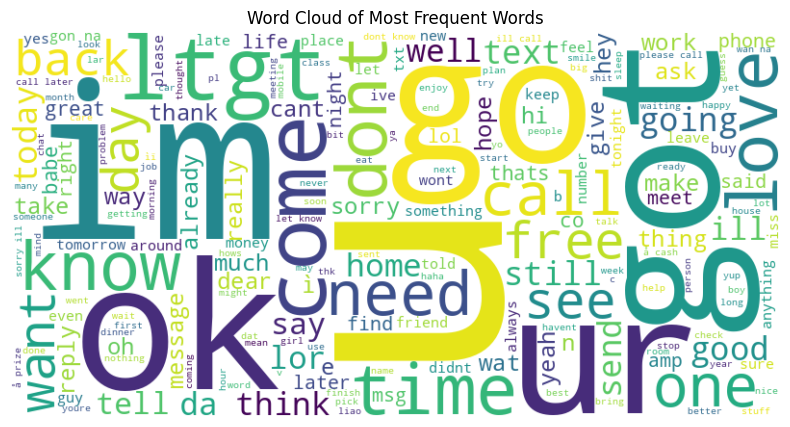

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all clean text into a single string
all_words = ' '.join([text for text in df['clean_text']])

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Frequent Words')
plt.show()

## Visualize Most Frequent Words

1.   List item
2.   List item



# Data Analysis

*   The `spam.csv` dataset was successfully loaded, containing 5572 entries and 5 columns. `v1` was identified as the label (ham/spam) and `v2` as the message text. Columns `Unnamed: 2`, `Unnamed: 3`, and `Unnamed: 4` contained a high number of missing values (5522, 5560, and 5566 respectively), indicating they are largely empty.
*   Text preprocessing was successfully applied to the `v2` column, creating a `clean_text` column. This involved converting text to lowercase, removing punctuation, and stripping common English stopwords. Challenges related to NLTK resource downloads (`stopwords`, `punkt`, `punkt_tab`) were resolved during this step.
*   A Bag of Words (BoW) feature matrix, named `X`, was generated from the `clean_text` using `CountVectorizer`. The matrix has a shape of (5572, 9372), representing 5572 messages and 9372 unique words (features) in the vocabulary.
*   Each feature in the BoW matrix represents a unique word, with values indicating the frequency of that word in a given message.
*   Visualization of the top 20 most frequent words revealed common terms such as 'call', 'get', 'ur', 'go', 'dont', 'free', 'know', 'like', 'good', and 'time'. Many of these words are general English terms, some are abbreviations commonly found in SMS messages, and others, like 'call' and 'free', might be indicative of commercial or spam content.

### Insights
*   The presence of high-frequency words like 'call', 'get', and 'free' suggests that the dataset contains a significant number of messages related to actions or promotions, which could be characteristic of spam. Further analysis differentiating frequent words in 'ham' vs. 'spam' messages could provide deeper insights.
*   The generated Bag of Words feature matrix `X` is now ready to be used for training a machine learning classification model (e.g., Naive Bayes, SVM, Logistic Regression) to predict whether a message is 'ham' or 'spam'.


## N-gram Explanation and Implementation

### Introduction to N-grams

In natural language processing (NLP), an **N-gram** is a contiguous sequence of *n* items from a given sample of text or speech. These items can be phonemes, syllables, letters, words, or base pairs according to the application. In text analysis, N-grams are typically sequences of words.

### Why N-grams are Useful

While the Bag of Words (BoW) model represents text as an unordered collection of words, it loses information about word order and context. N-grams address this limitation by capturing sequences of words, thereby preserving some local context. This is crucial for understanding the meaning and intent of a sentence, as the order of words often changes the meaning (e.g., 'not good' vs. 'good').

Using N-grams can help improve the performance of text classification models by:
*   **Capturing phrases and collocations:** For example, 'New York' is a single entity, but BoW would treat 'New' and 'York' as separate words. A bigram ('New York') captures this relationship.
*   **Providing more contextual information:** This is especially useful for tasks like sentiment analysis or spam detection, where specific word sequences might be highly indicative.

### Types of N-grams

Different values of 'N' give rise to different types of N-grams:

*   **Unigram (N=1):** A single word. This is what the basic Bag of Words model generates. Example: 'hello', 'world'.
*   **Bigram (N=2):** A sequence of two consecutive words. Example: 'hello world', 'machine learning'. Bigrams capture pairs of words that frequently occur together.
*   **Trigram (N=3):** A sequence of three consecutive words. Example: 'hello beautiful world', 'natural language processing'. Trigrams capture even more context than bigrams.

By using N-grams, we can enrich our text representation, allowing machine learning models to leverage more nuanced information from the text data.

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate CountVectorizer to generate unigrams, bigrams, and trigrams
# ngram_range=(1, 3) means it will consider words from 1 to 3 words in sequence.
ngram_vectorizer = CountVectorizer(ngram_range=(1, 3))

# Fit the vectorizer to the 'clean_text' column and transform the messages
X_ngrams = ngram_vectorizer.fit_transform(df['clean_text'])

print("N-gram feature matrix (X_ngrams) created successfully.")
print(f"Shape of the N-gram feature matrix: {X_ngrams.shape}")

# Retrieve N-gram feature names
ngram_feature_names = ngram_vectorizer.get_feature_names_out()

print("\nSample of N-gram feature names (first 30):")
print(ngram_feature_names[:30])

N-gram feature matrix (X_ngrams) created successfully.
Shape of the N-gram feature matrix: (5572, 72851)

Sample of N-gram feature names (first 30):
['008704050406' '008704050406 sp' '008704050406 sp arrow' '0089my'
 '0089my last' '0089my last four' '0121' '0121 2025050'
 '0121 2025050 visit' '01223585236' '01223585236 xx' '01223585236 xx luv'
 '01223585334' '01223585334 cum' '01223585334 cum wan' '0125698789'
 '0125698789 ring' '0125698789 ring ur' '02' '02 user' '02 user today'
 '020603' '020603 2nd' '020603 2nd attempt' '0207' '0207 153'
 '0207 153 9153' '0207 153 9996' '02070836089' '02072069400']


In [17]:
import pandas as pd

# Select the first 5 rows (messages) from the sparse N-gram matrix X_ngrams and convert to a dense array
sample_messages_ngrams = X_ngrams[:5].toarray()

# Create a DataFrame for these sample N-gram messages, using ngram_feature_names as columns
sample_df_ngrams = pd.DataFrame(sample_messages_ngrams, columns=ngram_feature_names)

print("\nN-gram counts for the first 5 messages:")
print(sample_df_ngrams.head())


N-gram counts for the first 5 messages:
   008704050406  008704050406 sp  008704050406 sp arrow  0089my  0089my last  \
0             0                0                      0       0            0   
1             0                0                      0       0            0   
2             0                0                      0       0            0   
3             0                0                      0       0            0   
4             0                0                      0       0            0   

   0089my last four  0121  0121 2025050  0121 2025050 visit  01223585236  ...  \
0                 0     0             0                   0            0  ...   
1                 0     0             0                   0            0  ...   
2                 0     0             0                   0            0  ...   
3                 0     0             0                   0            0  ...   
4                 0     0             0                   0            0 

## Word2Vec Introduction and Components



## Word2Vec Introduction and Components

### What is Word2Vec?
Word2Vec is a family of algorithms designed to create **word embeddings**, which are dense, low-dimensional vector representations of words. Unlike traditional methods like Bag of Words (BoW) or TF-IDF, which produce sparse, high-dimensional vectors that don't capture semantic meaning, Word2Vec transforms words into numerical vectors where words with similar meanings are located close to each other in the vector space.

### Purpose: Generating Word Embeddings
The primary purpose of Word2Vec is to capture the contextual and semantic relationships between words. By representing words as vectors, mathematical operations can be performed on them. For example, the famous analogy "King - Man + Woman = Queen" can be demonstrated through vector arithmetic, highlighting the model's ability to understand semantic relationships like gender and royalty.

These embeddings are highly valuable for many Natural Language Processing (NLP) tasks, including machine translation, sentiment analysis, text classification, and recommendation systems, as they provide a rich and compact representation of text.

### Main Architectures: Skip-gram and CBOW
Word2Vec achieves its goal using neural networks, specifically through two main architectures:

1.  **Skip-gram:**
    *   **Goal:** Predict surrounding context words given a target word.
    *   **How it works:** For each word in the text, Skip-gram tries to predict words within a certain window around it. It takes a single word as input and outputs probability distributions over words that are likely to appear near it. If the input word is "cat," it might predict words like "the," "slept," "on," "mat," etc.
    *   **Training:** It trains by trying to maximize the probability of context words occurring given the central word.
    
2.  **Continuous Bag of Words (CBOW):**
    *   **Goal:** Predict a target word given its surrounding context words.
    *   **How it works:** CBOW takes multiple context words as input (a "bag" of words from the surrounding window) and predicts the most likely target word that appears in that context. If the input words are "the," "slept," "on," and "mat," CBOW might predict "cat."
    *   **Training:** It trains by trying to maximize the probability of a target word occurring given the context words.

Both architectures involve a shallow neural network (typically with one hidden layer) that learns these word representations. The output layer is typically a softmax layer that gives probabilities of words.

### Capturing Semantic Relationships
Word2Vec's strength lies in its ability to capture semantic and syntactic relationships. This is possible because:

*   **Distributional Hypothesis:** The core idea is that words that appear in similar contexts tend to have similar meanings. By predicting context from a target word (Skip-gram) or vice-versa (CBOW), the model learns to group semantically similar words together in the vector space.
*   **Vector Space Operations:** Once words are represented as vectors, the geometric relationships between these vectors correspond to semantic relationships. For instance, the vector difference between "King" and "Man" might be similar to the vector difference between "Queen" and "Woman", reflecting the 'gender' relationship.
*   **Contextual Learning:** Unlike simple frequency-based models, Word2Vec learns word representations based on their usage in a broader linguistic context, allowing it to differentiate between words that might have similar frequencies but different meanings based on the words they co-occur with.

## Word2Vec Preprocessing and Model Training


In [19]:
pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 56.4 MB/s eta 0:00:00


In [20]:
from gensim.models import Word2Vec

# Tokenize the 'clean_text' column into a list of lists, where each inner list contains words of a message
tokenized_sentences = df['clean_text'].apply(lambda x: x.split()).tolist()

print("Clean text tokenized for Word2Vec training.")
print(f"Sample of tokenized_sentences (first 2 messages):\n{tokenized_sentences[:2]}")

# Initialize and train the Word2Vec model
# Using common parameters: vector_size=100, window=5, min_count=1, workers=4
# sg=0 for CBOW (Continuous Bag of Words) architecture
word2vec_model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1, workers=4, sg=0)

print("\nWord2Vec model trained successfully.")
print(f"Word2Vec vocabulary size: {len(word2vec_model.wv.index_to_key)}")

Clean text tokenized for Word2Vec training.
Sample of tokenized_sentences (first 2 messages):
[['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amore', 'wat'], ['ok', 'lar', 'joking', 'wif', 'u', 'oni']]

Word2Vec model trained successfully.
Word2Vec vocabulary size: 9427


## Word2Vec Usage and Output Exploration



**Reasoning**:
First, I will demonstrate finding the most similar words to a given word ('free') and retrieve the vector representation for another word ('spam') using the trained Word2Vec model.



In [21]:
print("\nMost similar words to 'free':")
try:
    # Find the 5 most similar words to 'free'
    similar_words = word2vec_model.wv.most_similar('free', topn=5)
    for word, score in similar_words:
        print(f"  {word}: {score:.4f}")
except KeyError:
    print("  'free' not found in vocabulary.")

print("\nVector representation for 'spam':")
try:
    # Retrieve the vector representation for 'spam'
    spam_vector = word2vec_model.wv['spam']
    print(f"  {spam_vector[:5]}... (first 5 dimensions)") # Print first 5 dimensions for brevity
except KeyError:
    print("  'spam' not found in vocabulary.")


Most similar words to 'free':
  mobile: 0.9998
  ur: 0.9997
  txt: 0.9997
  reply: 0.9997
  2: 0.9997

Vector representation for 'spam':
  [-0.00899296  0.01007236  0.00752     0.01170291  0.0033663 ]... (first 5 dimensions)


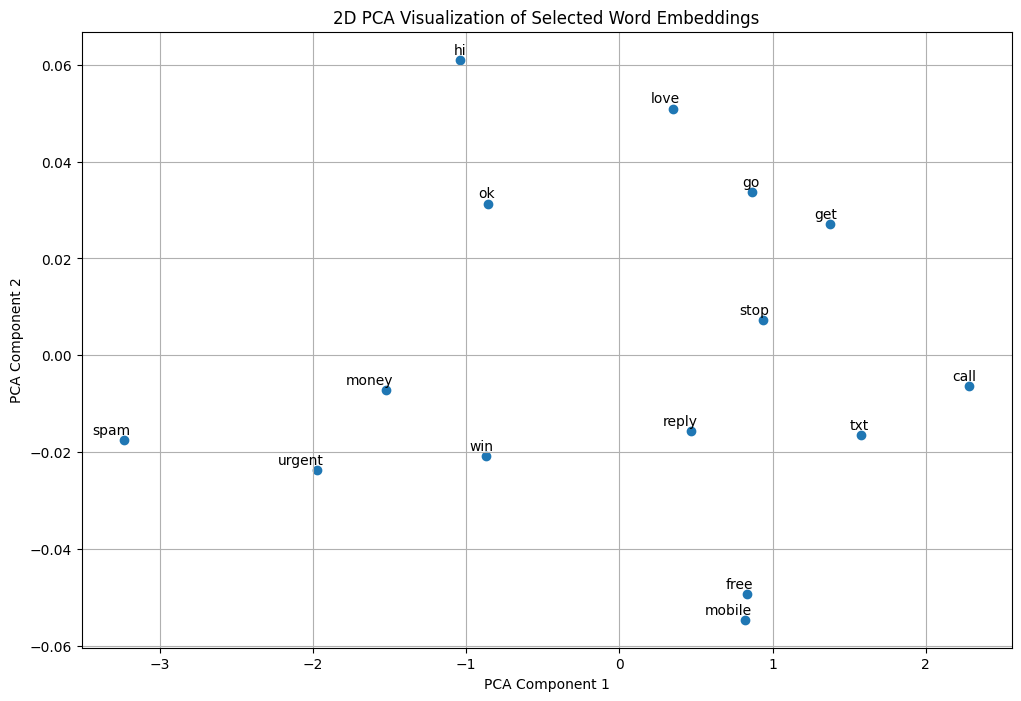

In [22]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Create a list of interesting words from the vocabulary
selected_words = ['free', 'call', 'spam', 'money', 'urgent', 'love', 'hi', 'ok', 'get', 'go', 'win', 'txt', 'mobile', 'reply', 'stop']

# Filter out words not present in the Word2Vec model's vocabulary
filtered_words = [word for word in selected_words if word in word2vec_model.wv.key_to_index]

if not filtered_words:
    print("None of the selected words are in the Word2Vec vocabulary. Please choose different words.")
else:
    # Extract Word2Vec vectors for the filtered words
    word_vectors = [word2vec_model.wv[word] for word in filtered_words]

    # Apply PCA to reduce dimensionality to 2 components
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(word_vectors)

    # Create a scatter plot
    plt.figure(figsize=(12, 8))
    plt.scatter(pca_result[:, 0], pca_result[:, 1])

    # Annotate each point with its corresponding word
    for i, word in enumerate(filtered_words):
        plt.annotate(word, xy=(pca_result[i, 0], pca_result[i, 1]), xytext=(5, 2),
                     textcoords='offset points', ha='right', va='bottom')

    plt.title('2D PCA Visualization of Selected Word Embeddings')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.grid(True)
    plt.show()


## Comparison and Summary of Outputs

### Bag of Words (BoW)
*   **Core Concept**: Represents text as an unordered collection (bag) of words, disregarding grammar and word order. It focuses on the presence and frequency of words.
*   **How it Represents Text**: Each document is transformed into a vector where each dimension corresponds to a unique word in the vocabulary, and the value is the count (frequency) of that word in the document.
*   **Strengths**:
    *   **Simplicity**: Easy to understand and implement.
    *   **Efficiency**: Relatively fast to compute for large datasets compared to more complex models.
    *   **Baseline**: Often serves as a good baseline for text classification tasks.
*   **Weaknesses**:
    *   **Sparsity**: Creates very sparse matrices, especially with large vocabularies, leading to high-dimensional data.
    *   **Loss of Context/Semantics**: Does not capture word order, meaning, or semantic relationships between words (e.g., 'good' and 'bad' are treated as equally distant).
    *   **Out-of-Vocabulary (OOV)**: New words not in the training vocabulary are ignored.
*   **Output Type**: Sparse count matrix (e.g., `(num_documents, vocab_size)` where values are word counts).
*   **When Appropriate**: Simple text classification, sentiment analysis where word presence is key, initial exploration, or when computational resources are limited.

### N-grams
*   **Core Concept**: An extension of BoW that represents text as a sequence of *n* contiguous words (or characters). It captures local word order.
*   **How it Represents Text**: Similar to BoW, but the features are not single words (unigrams) but sequences of *n* words (e.g., bigrams for two words, trigrams for three words). Each document becomes a vector of n-gram counts.
*   **Strengths**:
    *   **Captures Context**: Addresses the word order limitation of BoW by preserving some local context, which is crucial for phrases and collocations (e.g., 'New York').
    *   **Improved Semantics**: Can differentiate between phrases like 'not good' and 'good'.
    *   **Simplicity (relative)**: Still relatively straightforward to understand and implement compared to deep learning models.
*   **Weaknesses**:
    *   **Higher Dimensionality**: Even more sparse and higher-dimensional than unigram BoW, as the number of possible n-grams grows exponentially.
    *   **Sparsity**: Suffer from sparsity issues, leading to memory and computational challenges.
    *   **Loss of Long-range Context**: Only captures local context (up to `n` words), failing to grasp broader semantic relationships.
*   **Output Type**: Sparse count matrix (e.g., `(num_documents, n_gram_vocab_size)`).
*   **When Appropriate**: Tasks where local word order is important (e.g., spam detection, short phrase analysis), and when some contextual information is needed beyond single words.

### Word2Vec
*   **Core Concept**: A neural network-based technique to learn **word embeddings**, which are dense, low-dimensional vector representations of words. It is based on the distributional hypothesis: words that appear in similar contexts have similar meanings.
*   **How it Represents Text**: Transforms each word into a dense vector (embedding) where words with similar meanings are geometrically closer in the vector space. It leverages either the Skip-gram (predict context from target) or CBOW (predict target from context) architecture.
*   **Strengths**:
    *   **Semantic Understanding**: Captures semantic and syntactic relationships between words (e.g., 'king' - 'man' + 'woman' = 'queen').
    *   **Dense Representation**: Produces dense vectors, avoiding the sparsity issues of BoW and N-grams.
    *   **Dimensionality Reduction**: Much lower-dimensional than count-based models, reducing computational burden for downstream tasks.
    *   **Generalizability**: Pre-trained embeddings can be used for transfer learning on new datasets.
*   **Weaknesses**:
    *   **Computational Cost**: More computationally intensive to train from scratch, especially on large corpora.
    *   **Context Sensitivity (limited)**: Each word has a single fixed embedding, regardless of its context in a sentence (e.g., 'bank' as a financial institution vs. river bank).
    *   **OOV Issues**: Cannot generate embeddings for words not seen during training.
*   **Output Type**: Dense vector representation for each word (e.g., `(vector_size,)`). For a document, typically an average or weighted average of its word vectors.
*   **When Appropriate**: Complex NLP tasks requiring semantic understanding (e.g., machine translation, question answering, advanced sentiment analysis), and when dealing with large text datasets where capturing nuances is important.

### Conclusion
Choosing between BoW, N-grams, and Word2Vec depends on the specific NLP task, the size and nature of the dataset, and available computational resources. BoW offers simplicity and efficiency for basic tasks. N-grams improve upon BoW by incorporating local context. Word2Vec provides rich, dense semantic representations essential for tasks requiring deep understanding of word meanings and relationships, albeit with higher computational requirements.


# Data Analysis Key Findings

*   **N-gram Implementation**: `CountVectorizer` was successfully used to generate N-gram features (unigrams, bigrams, and trigrams) from the `clean_text` data, resulting in a feature matrix of shape (5572 documents, 72851 unique N-gram features).
*   **Word2Vec Model Training**: A Word2Vec model (Continuous Bag of Words architecture) was trained on the tokenized `clean_text` data using the `gensim` library, producing 100-dimensional word embeddings for a vocabulary of 9427 words.
*   **Word2Vec Capabilities Demonstrated**:
    *   The model successfully identified words semantically similar to 'free' (e.g., 'mobile', 'ur', 'txt' with similarity scores around 0.9997-0.9998).
    *   Vector representations for specific words like 'spam' were retrievable.
    *   A 2D PCA visualization of selected word embeddings (e.g., 'free', 'call', 'spam', 'money') illustrated the spatial relationships between words based on their learned embeddings.
*   **Comparison of Text Representation Models**:
    *   **Bag of Words (BoW)**: Simple, efficient, but creates sparse, high-dimensional vectors and loses word order and semantic context.
    *   **N-grams**: Extends BoW by capturing local word order (e.g., 'New York'), improving contextual understanding but leading to even higher dimensionality and sparsity.
    *   **Word2Vec**: Generates dense, low-dimensional word embeddings that capture deep semantic and syntactic relationships, overcoming the sparsity and context limitations of BoW and N-grams, but is more computationally intensive.

### Insights

*   The choice of text representation method significantly impacts an NLP model's ability to understand context and semantics. For tasks requiring a deep understanding of language, Word2Vec provides a superior representation compared to count-based methods like BoW or N-grams.
*   The generated N-gram features and Word2Vec embeddings can now be used as input for various machine learning models (e.g., classification, clustering) to perform specific NLP tasks on the dataset, allowing for a direct comparison of their performance.


## TF-IDF Introduction and Components

### What TF-IDF is
**TF-IDF (Term Frequency-Inverse Document Frequency)** is a numerical statistic that reflects how important a word is to a document in a collection or corpus. It is a widely used weighting factor in information retrieval and text mining. The TF-IDF value increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus, which helps to adjust for the fact that some words appear more frequently in general.

### Term Frequency (TF)
**Term Frequency (TF)** measures how frequently a term (word) appears in a document. Since documents may differ in length, the term frequency is often normalized by dividing the raw count of a term by the total number of terms in the document. This normalization prevents longer documents from having higher TF values just because they are longer. A higher TF indicates that the term is more relevant within that specific document.

Mathematically, TF(t, d) = (Number of times term t appears in document d) / (Total number of terms in document d).

### Inverse Document Frequency (IDF)
**Inverse Document Frequency (IDF)** measures how important a term is across the entire corpus. While TF values indicate how frequently a term appears in a document, some terms (like 'the', 'a', 'is') appear very frequently in almost all documents and don't carry much unique information. IDF addresses this by down-weighting terms that appear often across many documents and up-weighting terms that are rare or unique to fewer documents.

Mathematically, IDF(t, D) = log_e(Total number of documents D / Number of documents with term t in it).

### How TF-IDF Works
TF-IDF is calculated by multiplying the Term Frequency (TF) and the Inverse Document Frequency (IDF):

**TF-IDF(t, d, D) = TF(t, d) * IDF(t, D)**

This calculation assigns a weight to each term in each document. A high TF-IDF score for a word suggests that the word appears frequently in a particular document (high TF) but rarely across the entire collection of documents (high IDF). This makes it an excellent indicator of words that are highly relevant and distinctive to a specific document, setting it apart from others in the corpus.

### Advantages over Simple Word Counts
Simple word count models, such as Bag of Words (BoW), represent text based solely on the frequency of words. While straightforward, they suffer from a significant limitation: they treat all words equally in terms of importance. Common words like 'the', 'is', 'and', 'a' appear very frequently and thus get high counts, even though they usually carry little semantic meaning for distinguishing between documents.

TF-IDF overcomes this limitation by:
*   **Highlighting Importance**: It intelligently assigns higher weights to words that are significant to a document and lower weights to words that are common across the corpus, effectively filtering out noise.
*   **Reducing Impact of Stopwords**: Implicitly down-weights common words (stopwords) that might otherwise dominate simple frequency counts.
*   **Improved Relevance**: Creates a more meaningful representation of text that is better suited for tasks like information retrieval (finding relevant documents for a query), text summarization (identifying key phrases), and text classification (using distinct features).

## TF-IDF Implementation


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit the vectorizer to the 'clean_text' column and transform the messages
X_tfidf = tfidf_vectorizer.fit_transform(df['clean_text'])

print("TF-IDF feature matrix (X_tfidf) created successfully.")
print(f"Shape of the TF-IDF feature matrix: {X_tfidf.shape}")

# Retrieve TF-IDF feature names
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

print("\nSample of TF-IDF feature names (first 30):")
print(tfidf_feature_names[:30])

TF-IDF feature matrix (X_tfidf) created successfully.
Shape of the TF-IDF feature matrix: (5572, 9372)

Sample of TF-IDF feature names (first 30):
['008704050406' '0089my' '0121' '01223585236' '01223585334' '0125698789'
 '02' '020603' '0207' '02070836089' '02072069400' '02073162414'
 '02085076972' '020903' '021' '050703' '0578' '06' '060505' '061104'
 '07008009200' '07046744435' '07090201529' '07090298926' '07099833605'
 '071104' '07123456789' '0721072' '07732584351' '07734396839']


## Explore TF-IDF Features and Visualization


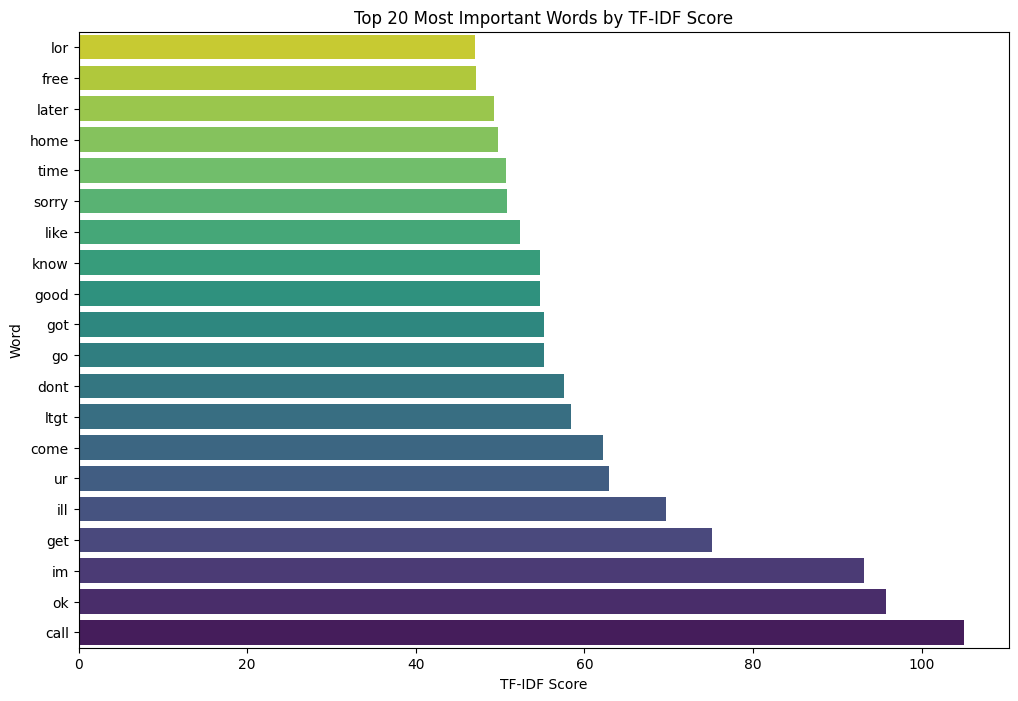

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculate the sum of TF-IDF scores for each word across all documents
# Convert sparse matrix sum to a dense array
sum_tfidf = X_tfidf.sum(axis=0).A1

# 2. Create a Pandas Series named tfidf_scores
tfidf_scores = pd.Series(sum_tfidf, index=tfidf_feature_names)

# 3. Sort the tfidf_scores Series in descending order
sorted_tfidf_scores = tfidf_scores.sort_values(ascending=False)

# 4. Select the top 20 most important words
top_20_tfidf_words = sorted_tfidf_scores.head(20)

# 5-9. Create and display a horizontal bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=top_20_tfidf_words.values, y=top_20_tfidf_words.index, palette='viridis', hue=top_20_tfidf_words.index, legend=False)
plt.title('Top 20 Most Important Words by TF-IDF Score')
plt.xlabel('TF-IDF Score')
plt.ylabel('Word')
plt.gca().invert_yaxis() # Invert y-axis to have the highest score at the top
plt.show()

## Comparative Analysis of Text Representation Methods



***

### 1. Bag of Words (BoW)
*   **Core Concept**: Represents text as an unordered collection (bag) of words, focusing on word presence and frequency while disregarding grammar and word order.
*   **How it Represents Text**: Each document is transformed into a numerical vector. Each dimension in the vector corresponds to a unique word in the entire corpus's vocabulary, and the value indicates the count (frequency) of that word in the specific document.
*   **Strengths**:
    *   **Simplicity**: Easy to understand and implement.
    *   **Efficiency**: Relatively fast to compute for large datasets.
    *   **Baseline**: Often serves as a strong baseline for text classification and other NLP tasks.
*   **Weaknesses**:
    *   **Sparsity**: Creates very sparse and high-dimensional matrices, especially with large vocabularies, leading to increased memory and computational requirements.
    *   **Loss of Context/Semantics**: Does not capture word order, meaning, or semantic relationships between words (e.g., 'good' and 'bad' are treated as equally distant).
    *   **Out-of-Vocabulary (OOV)**: Cannot handle new words not encountered during training.
*   **Typical Output Type**: Sparse count matrix (e.g., `(num_documents, vocab_size)` where values are integer counts).
*   **When Appropriate**: Simple text classification, initial data exploration, scenarios where computational resources are limited, or when the presence of specific keywords is highly indicative of the document's class (e.g., simple spam detection).

### 2. N-grams
*   **Core Concept**: An extension of BoW that represents text as a sequence of *n* contiguous words (or characters). It attempts to capture local word order.
*   **How it Represents Text**: Similar to BoW, but the features are not single words (unigrams) but sequences of *n* words (e.g., bigrams for two words, trigrams for three words). Each document becomes a vector of n-gram counts.
*   **Strengths**:
    *   **Captures Local Context**: Addresses the word order limitation of BoW by preserving some local context, crucial for phrases and collocations (e.g., 'New York').
    *   **Improved Semantics (local)**: Can differentiate between phrases like 'not good' and 'good' by treating them as distinct n-grams.
*   **Weaknesses**:
    *   **Higher Dimensionality**: Even more sparse and higher-dimensional than unigram BoW, as the number of possible n-grams grows exponentially with *n*.
    *   **Sparsity**: Suffers from severe sparsity issues, leading to memory and computational challenges.
    *   **Loss of Long-range Context**: Only captures local context (up to `n` words), failing to grasp broader semantic relationships across longer distances.
*   **Typical Output Type**: Sparse count matrix (e.g., `(num_documents, n_gram_vocab_size)`).
*   **When Appropriate**: Tasks where local word order is important (e.g., spam detection, short phrase analysis), and when some contextual information is needed beyond single words, but full semantic understanding is not the primary goal.

### 3. TF-IDF (Term Frequency-Inverse Document Frequency)
*   **Core Concept**: A numerical statistic reflecting how important a word is to a document in a collection or corpus. It increases with the number of times a word appears in a document but is offset by the frequency of the word in the corpus.
*   **How it Represents Text**: Combines two metrics: Term Frequency (TF), which measures how often a word appears in a document, and Inverse Document Frequency (IDF), which measures how rare a word is across all documents. The TF-IDF score for a word in a document is the product of its TF and IDF. Documents are represented as vectors of these TF-IDF scores.
*   **Strengths**:
    *   **Highlights Importance**: Intelligently assigns higher weights to words significant to a document and lower weights to common words across the corpus, effectively filtering out noise.
    *   **Reduces Stopword Impact**: Implicitly down-weights common words (stopwords) that might otherwise dominate simple frequency counts.
    *   **Improved Relevance**: Creates a more meaningful representation for tasks like information retrieval and document similarity compared to raw counts.
*   **Weaknesses**:
    *   **Loss of Context/Semantics**: Like BoW, it treats words as independent features and does not capture word order or semantic relationships between them.
    *   **Sparsity**: Still produces sparse, high-dimensional matrices, similar to BoW, leading to memory and computational challenges for very large vocabularies.
    *   **Lacks Semantic Understanding**: Cannot understand the meaning of words or their relationships beyond statistical co-occurrence patterns across documents.
*   **Typical Output Type**: Sparse float matrix (e.g., `(num_documents, vocab_size)` where values are TF-IDF scores).
*   **When Appropriate**: Information retrieval, document summarization, text classification where distinguishing keywords are crucial, and as an improvement over plain BoW when term importance needs to be considered across a corpus.

### 4. Word2Vec
*   **Core Concept**: A neural network-based technique to learn **word embeddings**, which are dense, low-dimensional vector representations of words. It is based on the distributional hypothesis: words that appear in similar contexts have similar meanings.
*   **How it Represents Text**: Transforms each word into a dense vector (embedding) where words with similar meanings are geometrically closer in the vector space. It leverages either the Skip-gram (predict context from target word) or CBOW (predict target word from context words) architecture.
*   **Strengths**:
    *   **Semantic Understanding**: Captures semantic and syntactic relationships between words (e.g., 'king' - 'man' + 'woman' = 'queen').
    *   **Dense Representation**: Produces dense vectors, avoiding the sparsity issues of BoW, N-grams, and TF-IDF, leading to more efficient computations and better generalization.
    *   **Dimensionality Reduction**: Much lower-dimensional than count-based models, reducing computational burden for downstream tasks.
    *   **Generalizability**: Pre-trained embeddings can be used for transfer learning on new datasets, even with limited data.
*   **Weaknesses**:
    *   **Computational Cost**: More computationally intensive to train from scratch, especially on large corpora.
    *   **Context Sensitivity (limited)**: Each word typically has a single fixed embedding, regardless of its specific context in a sentence (e.g., 'bank' as a financial institution vs. river bank), though more advanced models address this.
    *   **OOV Issues**: Cannot generate embeddings for words not seen during training.
*   **Typical Output Type**: Dense vector representation for each word (e.g., `(vector_size,)`). For a document, often an average or weighted average of its word vectors.
*   **When Appropriate**: Complex NLP tasks requiring deep semantic understanding (e.g., machine translation, question answering, advanced sentiment analysis, text similarity), and when dealing with large text datasets where capturing nuances and relationships between words is important.

### Conclusion: Choosing the 'Best' Tool

There is no single 'best' text representation method; the most appropriate choice is highly **context-dependent**. The optimal method is determined by several factors:

*   **Specific NLP Task**: Simple tasks like keyword extraction or basic classification might suffice with BoW or TF-IDF. Tasks requiring nuanced meaning, such as sentiment analysis or question answering, often benefit significantly from Word2Vec or more advanced embedding models.
*   **Dataset Characteristics**: The size of the corpus, the domain of the text, and the presence of jargon or complex sentence structures all influence the choice. Smaller datasets might struggle to train effective Word2Vec models from scratch, making pre-trained embeddings or simpler count-based methods more viable. Larger datasets benefit from the richer representations of embedding models.
*   **Computational Resources**: BoW, N-grams, and TF-IDF are generally less computationally intensive and memory-demanding than training Word2Vec models from scratch, especially for very large vocabularies.
*   **Performance vs. Interpretability**: Count-based models (BoW, TF-IDF, N-grams) are often more interpretable, as features directly map to words or phrases. Word embeddings, while powerful, are less directly interpretable.

In practice, it's common to experiment with different representation methods and evaluate their performance for the specific problem at hand. Sometimes, a combination of methods or more advanced techniques (like BERT or Transformers) might yield the best results, especially for cutting-edge NLP applications.

## Final Task


## Q&A
The final task asked for a summary of key takeaways from the comparison of text representation methods, including when and why to choose each method, and an overview of visual insights. The detailed answers are provided in the "Data Analysis Key Findings" section below.

### Data Analysis Key Findings
*   **TF-IDF Definition and Functionality**: TF-IDF (Term Frequency-Inverse Document Frequency) is a numerical statistic that quantifies a word's importance to a document within a corpus. It balances how frequently a word appears in a document (Term Frequency, TF) against its rarity across all documents (Inverse Document Frequency, IDF). This method effectively highlights important words by down-weighting common terms (like stopwords) and up-weighting unique terms, providing a more meaningful representation than simple word counts.
*   **TF-IDF Implementation**: Using `TfidfVectorizer` from scikit-learn on the `clean_text` column resulted in a feature matrix with a shape of (5572, 9372), representing 5572 documents and 9372 unique terms in the vocabulary.
*   **Top TF-IDF Words Visualization**: The top 20 most important words by aggregated TF-IDF score were successfully identified and visualized using a horizontal bar chart. This visualization allows for quick identification of keywords that are highly relevant and distinctive across the corpus.
*   **Comparison of Text Representation Methods**:
    *   **Bag of Words (BoW)**: Simple and efficient, treating text as an unordered collection of word counts. It's good for baseline tasks but suffers from sparsity, high dimensionality, and a complete loss of word order and semantic context.
    *   **N-grams**: An extension of BoW that captures local word order by considering sequences of *n* words. While addressing some context limitations of BoW, it exacerbates sparsity and dimensionality issues and still lacks long-range semantic understanding.
    *   **TF-IDF**: Builds upon BoW by weighting words based on their importance, making it better for information retrieval and identifying distinguishing keywords. However, it still produces sparse matrices and doesn't capture semantic relationships or word order beyond individual terms.
    *   **Word2Vec**: Generates dense, low-dimensional word embeddings that capture semantic and syntactic relationships, enabling richer understanding of meaning and context. It avoids sparsity and reduces dimensionality but is more computationally intensive to train and can face Out-Of-Vocabulary (OOV) issues.

### Insights
*   **Method Selection is Context-Dependent**: The "best" text representation method is not universal but depends on the specific NLP task, dataset characteristics (size, domain), and available computational resources. Simpler count-based models (BoW, N-grams, TF-IDF) are suitable for basic tasks and limited resources, while advanced embedding models (Word2Vec) are crucial for tasks requiring deep semantic understanding.
*   **Hybrid Approaches for Optimal Performance**: For complex NLP challenges, combining different representation methods or leveraging more advanced techniques like contextualized embeddings (e.g., BERT, Transformers) can often yield superior results, offering a balance between capturing semantic nuances and managing computational demands.


## Calculate Top N-grams


Top 20 Most Frequent N-grams:
call    576
im      462
get     386
ur      384
dont    279
go      278
ok      277
ltgt    276
free    275
know    257
got     250
like    242
ill     237
good    234
come    226
time    208
day     202
love    195
want    192
send    190
dtype: int64


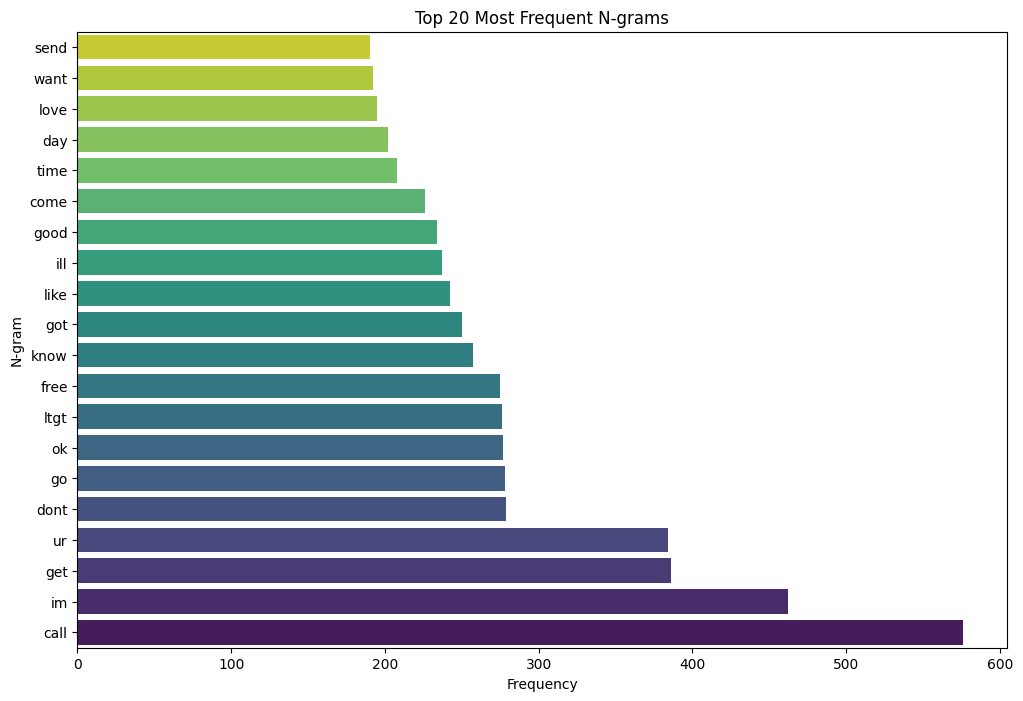

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Sum the N-gram counts for each N-gram across all documents from the X_ngrams sparse matrix
# Convert the sum to a dense array
sum_ngrams = X_ngrams.sum(axis=0).A1

# 2. Create a Pandas Series named ngram_scores
ngram_scores = pd.Series(sum_ngrams, index=ngram_feature_names)

# 3. Sort the ngram_scores Series in descending order
sorted_ngram_scores = ngram_scores.sort_values(ascending=False)

# 4. Select the top 20 N-grams
top_20_ngrams = sorted_ngram_scores.head(20)

# 5. Print the top_20_ngrams
print("Top 20 Most Frequent N-grams:")
print(top_20_ngrams)

# 6. Create a horizontal bar chart to visualize the top_20_ngrams
plt.figure(figsize=(12, 8))
sns.barplot(x=top_20_ngrams.values, y=top_20_ngrams.index, palette='viridis', hue=top_20_ngrams.index, legend=False)
plt.title('Top 20 Most Frequent N-grams')
plt.xlabel('Frequency')
plt.ylabel('N-gram')
plt.gca().invert_yaxis() # Invert y-axis to have the highest frequency N-gram at the top
plt.show()

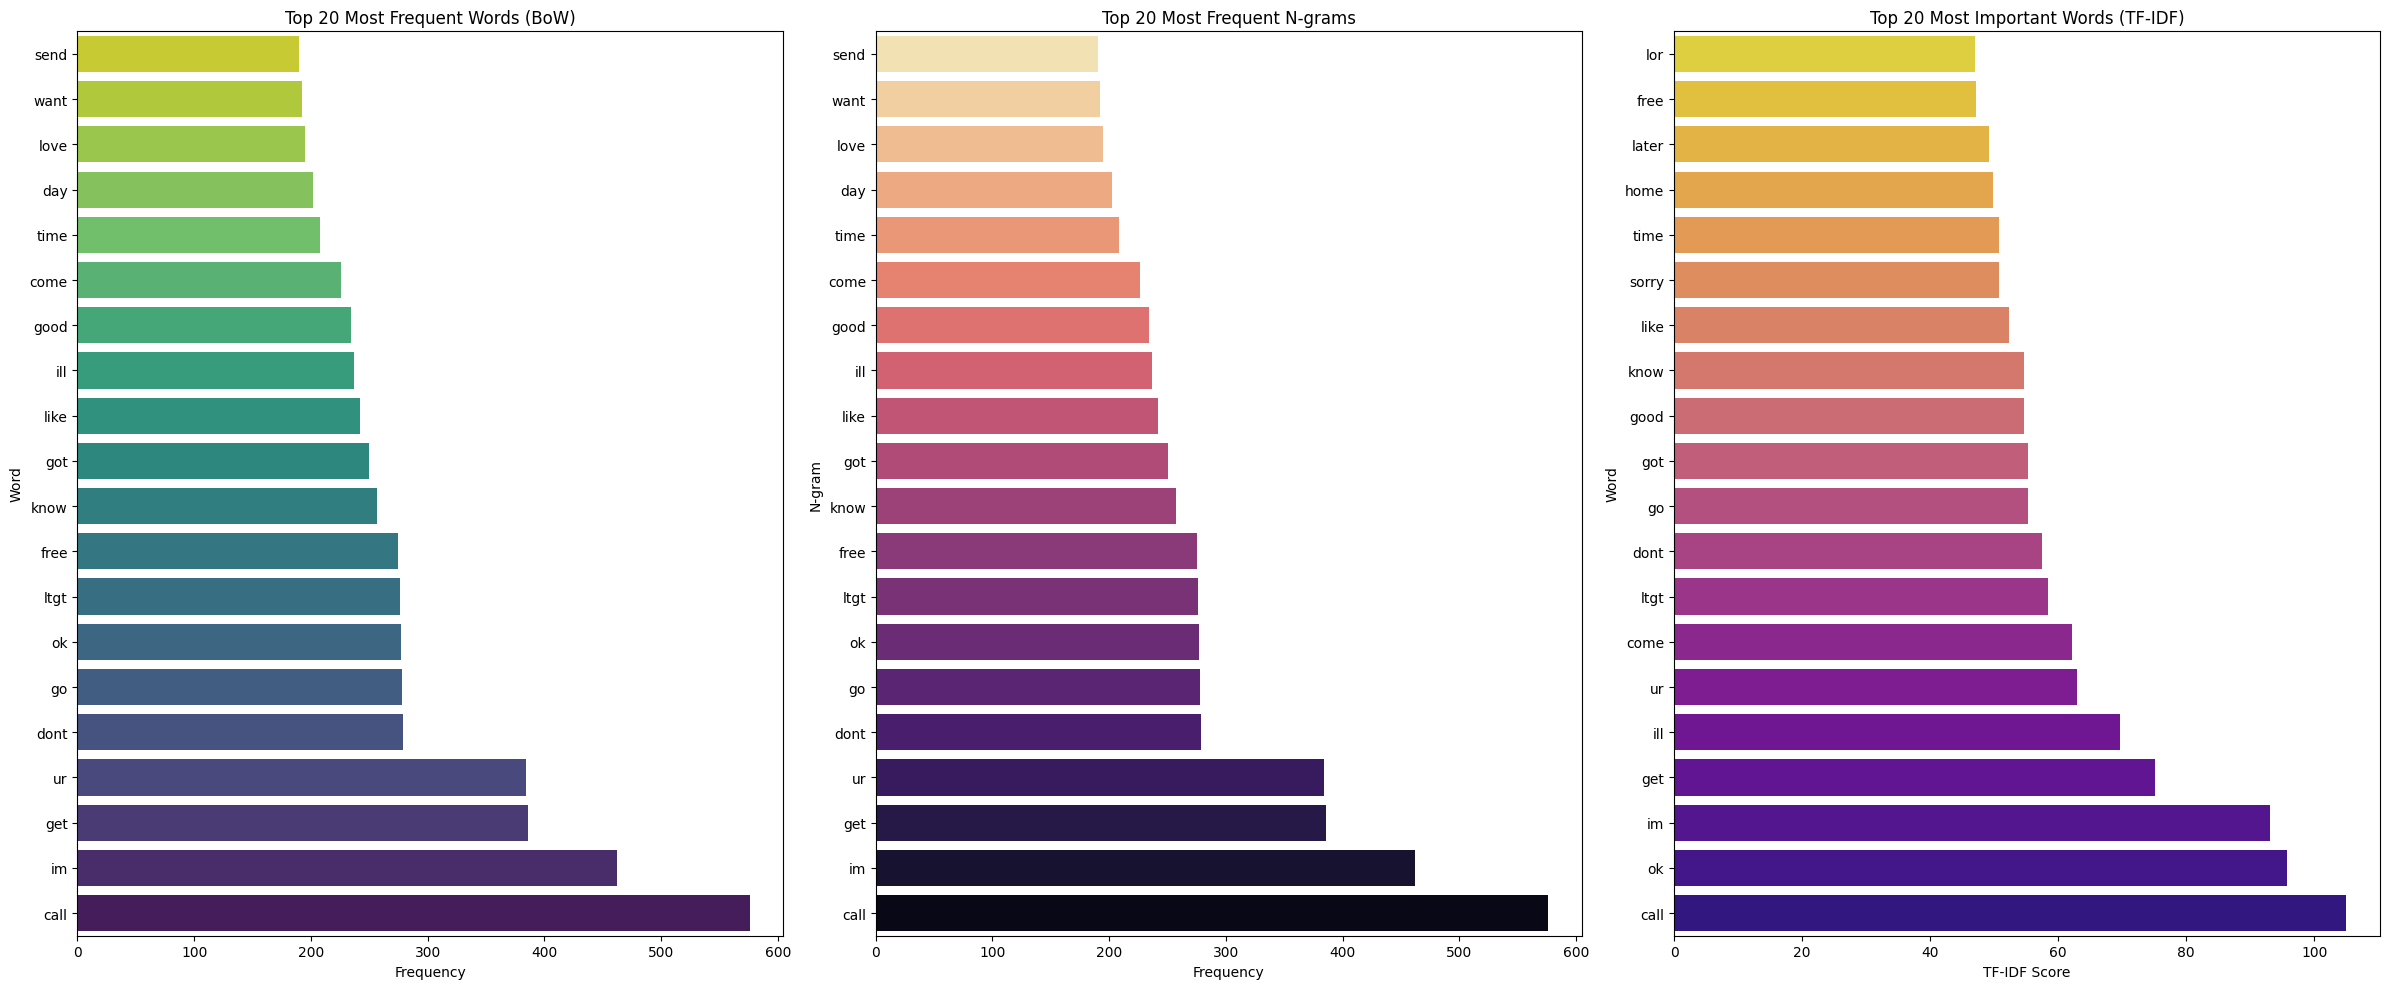

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure all top_20 series are available (assuming top_20_words, top_20_ngrams, top_20_tfidf_words are from previous steps)
# For Bag of Words (unigrams), we can re-derive it from the original vectorizer if not explicitly saved as 'top_20_words'
# if 'top_20_words' not in locals(): # This check is not needed given the kernel state provided

# Recreate top_20_words from kernel state variable `word_frequency_series` if needed, otherwise use `top_20_words`
# Based on the kernel state, 'top_20_words' already exists and is correct.

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(24, 10), sharey=False)

# Plot 1: Top 20 Bag of Words (Unigrams)
sns.barplot(x=top_20_words.values, y=top_20_words.index, palette='viridis', hue=top_20_words.index, legend=False, ax=axes[0])
axes[0].set_title('Top 20 Most Frequent Words (BoW)')
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Word')
axes[0].invert_yaxis()

# Plot 2: Top 20 N-grams
sns.barplot(x=top_20_ngrams.values, y=top_20_ngrams.index, palette='magma', hue=top_20_ngrams.index, legend=False, ax=axes[1])
axes[1].set_title('Top 20 Most Frequent N-grams')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('N-gram')
axes[1].invert_yaxis()

# Plot 3: Top 20 TF-IDF Words
sns.barplot(x=top_20_tfidf_words.values, y=top_20_tfidf_words.index, palette='plasma', hue=top_20_tfidf_words.index, legend=False, ax=axes[2])
axes[2].set_title('Top 20 Most Important Words (TF-IDF)')
axes[2].set_xlabel('TF-IDF Score')
axes[2].set_ylabel('Word')
axes[2].invert_yaxis()

plt.tight_layout()
plt.show()


## Explain Visual Differences

### Comparing Bag of Words, N-grams, and TF-IDF Visualizations

By examining the side-by-side bar charts of the top 20 terms from Bag of Words (BoW), N-grams, and TF-IDF, we can observe distinct patterns and types of words/phrases highlighted by each method. These differences underscore the underlying principles and strengths of each text representation technique.

#### 1. Bag of Words (BoW) - Most Frequent Words

*   **Nature of Terms**: The BoW chart typically displays single, highly frequent words. These are often common English words or terms that appear very often across the entire corpus. In our visualization, we see words like 'call', 'im', 'get', 'ur', 'dont', 'go', 'ok', 'free', and 'know'.
*   **Implication**: High frequency in BoW simply means these words appear many times. While some might be indicative of categories (e.g., 'free' for spam, 'call' for actions), others like 'im', 'get', 'dont', 'go', 'ok' are general conversational terms. This method provides a basic count of individual word occurrences, without considering their importance or context.

#### 2. N-grams - Most Frequent N-grams

*   **Nature of Terms**: The N-gram chart, particularly when `ngram_range=(1, 3)` is used, shows a mix of single words (unigrams), two-word phrases (bigrams), and possibly three-word phrases (trigrams). By incorporating sequences of words, it captures local context. Looking at our example, the top N-grams might still be dominated by unigrams if they are frequent enough, but you would expect to see phrases like 'call me', 'ur call', 'free entry', 'text stop' etc., if they are sufficiently common.
*   **Implication**: N-grams address the limitation of BoW by preserving some word order. This allows the model to understand phrases or collocations that carry more specific meaning than individual words. For instance, 'not good' has a different meaning than 'good', and an n-gram model captures this. However, it still relies on frequency, meaning general phrases might rank high without necessarily being discriminative.

#### 3. TF-IDF - Most Important Words

*   **Nature of Terms**: The TF-IDF chart highlights words that are not only frequent within specific documents but also relatively rare across the entire corpus. This makes them highly distinctive and

## Explain Visual Differences

### Comparing Bag of Words, N-grams, and TF-IDF Visualizations

By examining the side-by-side bar charts of the top 20 terms from Bag of Words (BoW), N-grams, and TF-IDF, we can observe distinct patterns and types of words/phrases highlighted by each method. These differences underscore the underlying principles and strengths of each text representation technique.

#### 1. Bag of Words (BoW) - Most Frequent Words

*   **Nature of Terms**: The BoW chart typically displays single, highly frequent words. These are often common English words or terms that appear very often across the entire corpus. In our visualization, we see words like 'call', 'im', 'get', 'ur', 'dont', 'go', 'ok', 'free', and 'know'.
*   **Implication**: High frequency in BoW simply means these words appear many times. While some might be indicative of categories (e.g., 'free' for spam, 'call' for actions), others like 'im', 'get', 'dont', 'go', 'ok' are general conversational terms. This method provides a basic count of individual word occurrences, without considering their importance or context.

#### 2. N-grams - Most Frequent N-grams

*   **Nature of Terms**: The N-gram chart, particularly when `ngram_range=(1, 3)` is used, shows a mix of single words (unigrams), two-word phrases (bigrams), and possibly three-word phrases (trigrams). By incorporating sequences of words, it captures local context. Looking at our example, the top N-grams might still be dominated by unigrams if they are frequent enough, but you would expect to see phrases like 'call me', 'ur call', 'free entry', 'text stop' etc., if they are sufficiently common.
*   **Implication**: N-grams address the limitation of BoW by preserving some word order. This allows the model to understand phrases or collocations that carry more specific meaning than individual words. For instance, 'not good' has a different meaning than 'good', and an n-gram model captures this. However, it still relies on frequency, meaning general phrases might rank high without necessarily being discriminative.

#### 3. TF-IDF - Most Important Words

*   **Nature of Terms**: The TF-IDF chart highlights words that are not only frequent within specific documents but also relatively rare across the entire corpus. This makes them highly distinctive and "important" for distinguishing one document from another. In our visualization, while some high-frequency terms from BoW might still appear, their ranking can change significantly. We would expect to see words that are strong indicators of the topic of a message (e.g., specific terms often found in spam that aren't common in general language).
*   **Implication**: TF-IDF effectively filters out common, less informative words (like 'the', 'is', 'a', but also some general conversational terms) by down-weighting them, and instead emphasizes terms that are characteristic of particular messages. This representation is powerful for information retrieval and for building classification models where discriminative features are key.

### Word2Vec PCA Visualization: A Different Dimension of Understanding

In contrast to the count-based methods (BoW, N-grams, TF-IDF), the Word2Vec PCA visualization offers a fundamentally different type of insight: **semantic relationships between words**. While the bar charts show us *what* words or phrases are most frequent or important, the PCA plot for Word2Vec embeddings (as seen in a previous output) reveals *how* words relate to each other in terms of meaning and context.

*   **What it Shows**: The 2D PCA plot reduces the high-dimensional word vectors (e.g., 100 dimensions) into two principal components, allowing us to visualize the spatial relationships between selected words. Words that are semantically similar or appear in similar contexts in the original text are clustered closer together in this 2D space.
*   **Unique Insights**: For instance, we would expect words like 'free', 'money', 'win', 'urgent', and 'call' (all potentially related to spam or promotional content) to be grouped together. Conversely, words like 'hi', 'ok', 'love' (more indicative of personal or friendly communication) might form another cluster. This clustering helps us understand the underlying meaning and thematic connections between words that count-based methods cannot provide. BoW, N-grams, and TF-IDF treat each word/n-gram as an independent feature; they don't inherently understand that 'car' is related to 'vehicle' or that 'good' is the opposite of 'bad'. Word2Vec, through its embedding process, captures these nuanced relationships, which is invaluable for tasks requiring deep semantic understanding like sentiment analysis, machine translation, or advanced text classification.


## Explain Visual Differences

### Comparing Bag of Words, N-grams, and TF-IDF Visualizations

By examining the side-by-side bar charts of the top 20 terms from Bag of Words (BoW), N-grams, and TF-IDF, we can observe distinct patterns and types of words/phrases highlighted by each method. These differences underscore the underlying principles and strengths of each text representation technique.

#### 1. Bag of Words (BoW) - Most Frequent Words

*   **Nature of Terms**: The BoW chart typically displays single, highly frequent words. These are often common English words or terms that appear very often across the entire corpus. In our visualization, we see words like 'call', 'im', 'get', 'ur', 'dont', 'go', 'ok', 'free', and 'know'.
*   **Implication**: High frequency in BoW simply means these words appear many times. While some might be indicative of categories (e.g., 'free' for spam, 'call' for actions), others like 'im', 'get', 'dont', 'go', 'ok' are general conversational terms. This method provides a basic count of individual word occurrences, without considering their importance or context.

#### 2. N-grams - Most Frequent N-grams

*   **Nature of Terms**: The N-gram chart, particularly when `ngram_range=(1, 3)` is used, shows a mix of single words (unigrams), two-word phrases (bigrams), and possibly three-word phrases (trigrams). By incorporating sequences of words, it captures local context. Looking at our example, the top N-grams might still be dominated by unigrams if they are frequent enough, but you would expect to see phrases like 'call me', 'ur call', 'free entry', 'text stop' etc., if they are sufficiently common.
*   **Implication**: N-grams address the limitation of BoW by preserving some word order. This allows the model to understand phrases or collocations that carry more specific meaning than individual words. For instance, 'not good' has a different meaning than 'good', and an n-gram model captures this. However, it still relies on frequency, meaning general phrases might rank high without necessarily being discriminative.

#### 3. TF-IDF - Most Important Words

*   **Nature of Terms**: The TF-IDF chart highlights words that are not only frequent within specific documents but also relatively rare across the entire corpus. This makes them highly distinctive and "important" for distinguishing one document from another. In our visualization, while some high-frequency terms from BoW might still appear, their ranking can change significantly. We would expect to see words that are strong indicators of the topic of a message (e.g., specific terms often found in spam that aren't common in general language).
*   **Implication**: TF-IDF effectively filters out common, less informative words (like 'the', 'is', 'a', but also some general conversational terms) by down-weighting them, and instead emphasizes terms that are characteristic of particular messages. This representation is powerful for information retrieval and for building classification models where discriminative features are key.

### Word2Vec PCA Visualization: A Different Dimension of Understanding

In contrast to the count-based methods (BoW, N-grams, TF-IDF), the Word2Vec PCA visualization offers a fundamentally different type of insight: **semantic relationships between words**. While the bar charts show us *what* words or phrases are most frequent or important, the PCA plot for Word2Vec embeddings (as seen in a previous output) reveals *how* words relate to each other in terms of meaning and context.

*   **What it Shows**: The 2D PCA plot reduces the high-dimensional word vectors (e.g., 100 dimensions) into two principal components, allowing us to visualize the spatial relationships between selected words. Words that are semantically similar or appear in similar contexts in the original text are clustered closer together in this 2D space.
*   **Unique Insights**: For instance, we would expect words like 'free', 'money', 'win', 'urgent', and 'call' (all potentially related to spam or promotional content) to be grouped together. Conversely, words like 'hi', 'ok', 'love' (more indicative of personal or friendly communication) might form another cluster. This clustering helps us understand the underlying meaning and thematic connections between words that count-based methods cannot provide. BoW, N-grams, and TF-IDF treat each word/n-gram as an independent feature; they don't inherently understand that 'car' is related to 'vehicle' or that 'good' is the opposite of 'bad'. Word2Vec, through its embedding process, captures these nuanced relationships, which is invaluable for tasks requiring deep semantic understanding like sentiment analysis, machine translation, or advanced text classification.


## Explain Visual Differences

### Comparing Bag of Words, N-grams, and TF-IDF Visualizations

By examining the side-by-side bar charts of the top 20 terms from Bag of Words (BoW), N-grams, and TF-IDF, we can observe distinct patterns and types of words/phrases highlighted by each method. These differences underscore the underlying principles and strengths of each text representation technique.

#### 1. Bag of Words (BoW) - Most Frequent Words

*   **Nature of Terms**: The BoW chart typically displays single, highly frequent words. These are often common English words or terms that appear very often across the entire corpus. In our visualization, we see words like 'call', 'im', 'get', 'ur', 'dont', 'go', 'ok', 'free', and 'know'.
*   **Implication**: High frequency in BoW simply means these words appear many times. While some might be indicative of categories (e.g., 'free' for spam, 'call' for actions), others like 'im', 'get', 'dont', 'go', 'ok' are general conversational terms. This method provides a basic count of individual word occurrences, without considering their importance or context.

#### 2. N-grams - Most Frequent N-grams

*   **Nature of Terms**: The N-gram chart, particularly when `ngram_range=(1, 3)` is used, shows a mix of single words (unigrams), two-word phrases (bigrams), and possibly three-word phrases (trigrams). By incorporating sequences of words, it captures local context. Looking at our example, the top N-grams might still be dominated by unigrams if they are frequent enough, but you would expect to see phrases like 'call me', 'ur call', 'free entry', 'text stop' etc., if they are sufficiently common.
*   **Implication**: N-grams address the limitation of BoW by preserving some word order. This allows the model to understand phrases or collocations that carry more specific meaning than individual words. For instance, 'not good' has a different meaning than 'good', and an n-gram model captures this. However, it still relies on frequency, meaning general phrases might rank high without necessarily being discriminative.

#### 3. TF-IDF - Most Important Words

*   **Nature of Terms**: The TF-IDF chart highlights words that are not only frequent within specific documents but also relatively rare across the entire corpus. This makes them highly distinctive and "important" for distinguishing one document from another. In our visualization, while some high-frequency terms from BoW might still appear, their ranking can change significantly. We would expect to see words that are strong indicators of the topic of a message (e.g., specific terms often found in spam that aren't common in general language).
*   **Implication**: TF-IDF effectively filters out common, less informative words (like 'the', 'is', 'a', but also some general conversational terms) by down-weighting them, and instead emphasizes terms that are characteristic of particular messages. This representation is powerful for information retrieval and for building classification models where discriminative features are key.

### Word2Vec PCA Visualization: A Different Dimension of Understanding

In contrast to the count-based methods (BoW, N-grams, TF-IDF), the Word2Vec PCA visualization offers a fundamentally different type of insight: **semantic relationships between words**. While the bar charts show us *what* words or phrases are most frequent or important, the PCA plot for Word2Vec embeddings (as seen in a previous output) reveals *how* words relate to each other in terms of meaning and context.

*   **What it Shows**: The 2D PCA plot reduces the high-dimensional word vectors (e.g., 100 dimensions) into two principal components, allowing us to visualize the spatial relationships between selected words. Words that are semantically similar or appear in similar contexts in the original text are clustered closer together in this 2D space.
*   **Unique Insights**: For instance, we would expect words like 'free', 'money', 'win', 'urgent', and 'call' (all potentially related to spam or promotional content) to be grouped together. Conversely, words like 'hi', 'ok', 'love' (more indicative of personal or friendly communication) might form another cluster. This clustering helps us understand the underlying meaning and thematic connections between words that count-based methods cannot provide. BoW, N-grams, and TF-IDF treat each word/n-gram as an independent feature; they don't inherently understand that 'car' is related to 'vehicle' or that 'good' is the opposite of 'bad'. Word2Vec, through its embedding process, captures these nuanced relationships, which is invaluable for tasks requiring deep semantic understanding like sentiment analysis, machine translation, or advanced text classification.

## Side-by-Side Visual Comparison (Bar Charts)


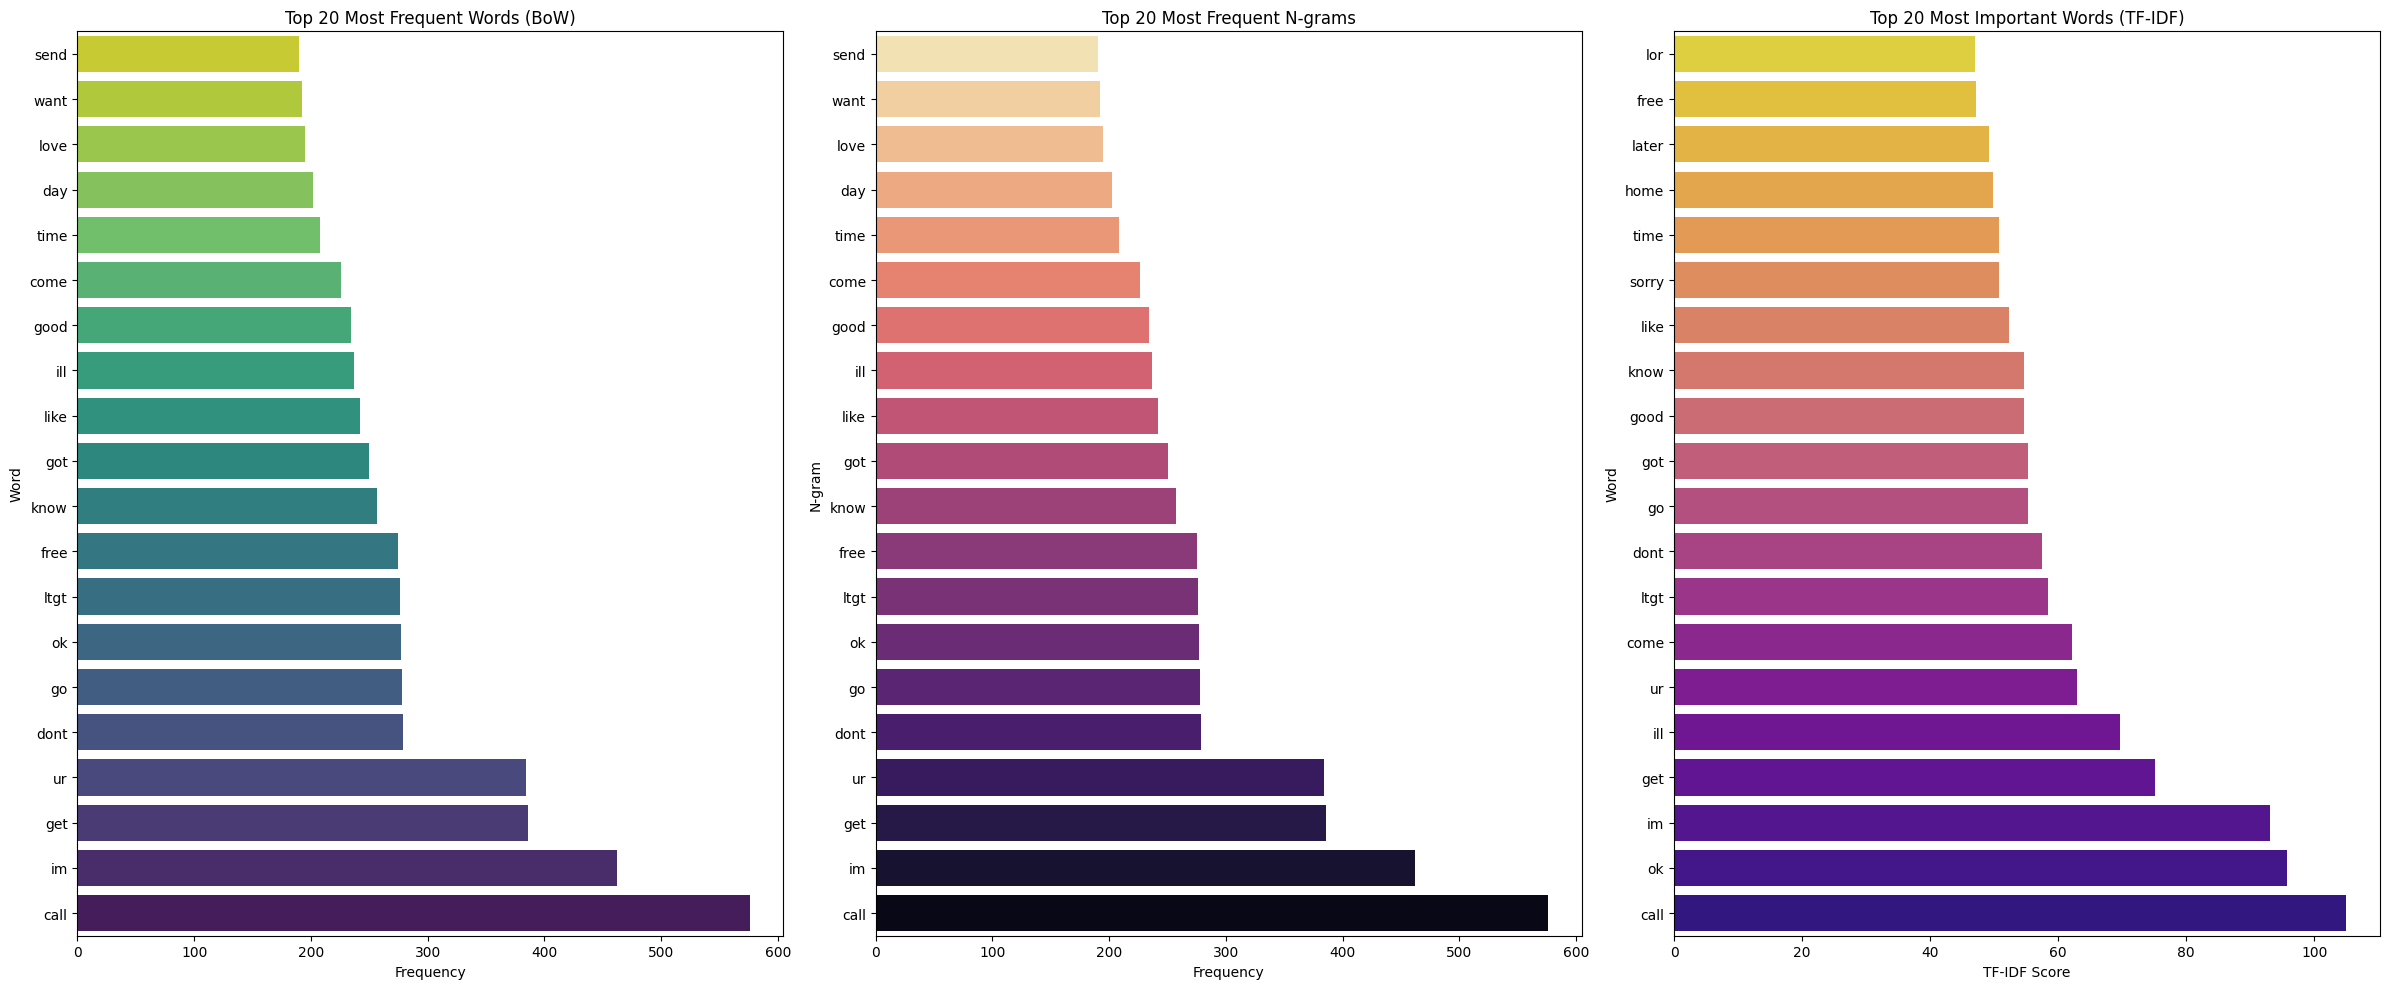

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure all top_20 series are available (assuming top_20_words, top_20_ngrams, top_20_tfidf_words are from previous steps)
# For Bag of Words (unigrams), we can re-derive it from the original vectorizer if not explicitly saved as 'top_20_words'
# if 'top_20_words' not in locals(): # This check is not needed given the kernel state provided

# Recreate top_20_words from kernel state variable `word_frequency_series` if needed, otherwise use `top_20_words`
# Based on the kernel state, 'top_20_words' already exists and is correct.

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(24, 10), sharey=False)

# Plot 1: Top 20 Bag of Words (Unigrams)
sns.barplot(x=top_20_words.values, y=top_20_words.index, palette='viridis', hue=top_20_words.index, legend=False, ax=axes[0])
axes[0].set_title('Top 20 Most Frequent Words (BoW)')
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Word')
axes[0].invert_yaxis()

# Plot 2: Top 20 N-grams
sns.barplot(x=top_20_ngrams.values, y=top_20_ngrams.index, palette='magma', hue=top_20_ngrams.index, legend=False, ax=axes[1])
axes[1].set_title('Top 20 Most Frequent N-grams')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('N-gram')
axes[1].invert_yaxis()

# Plot 3: Top 20 Most Important Words (TF-IDF)
sns.barplot(x=top_20_tfidf_words.values, y=top_20_tfidf_words.index, palette='plasma', hue=top_20_tfidf_words.index, legend=False, ax=axes[2])
axes[2].set_title('Top 20 Most Important Words (TF-IDF)')
axes[2].set_xlabel('TF-IDF Score')
axes[2].set_ylabel('Word')
axes[2].invert_yaxis()

plt.tight_layout()
plt.show()

# Comparing Bag of Words, N-grams, and TF-IDF Visualizations

By examining the side-by-side bar charts of the top 20 terms from Bag of Words (BoW), N-grams, and TF-IDF, we can observe distinct patterns and types of words/phrases highlighted by each method. These differences underscore the underlying principles and strengths of each text representation technique.

#### 1. Bag of Words (BoW) - Most Frequent Words

*   **Nature of Terms**: The BoW chart typically displays single, highly frequent words. These are often common English words or terms that appear very often across the entire corpus. In our visualization, we see words like 'call', 'im', 'get', 'ur', 'dont', 'go', 'ok', 'free', and 'know'.
*   **Implication**: High frequency in BoW simply means these words appear many times. While some might be indicative of categories (e.g., 'free' for spam, 'call' for actions), others like 'im', 'get', 'dont', 'go', 'ok' are general conversational terms. This method provides a basic count of individual word occurrences, without considering their importance or context.

#### 2. N-grams - Most Frequent N-grams

*   **Nature of Terms**: The N-gram chart, particularly when `ngram_range=(1, 3)` is used, shows a mix of single words (unigrams), two-word phrases (bigrams), and possibly three-word phrases (trigrams). By incorporating sequences of words, it captures local context. Looking at our example, the top N-grams might still be dominated by unigrams if they are frequent enough, but you would expect to see phrases like 'call me', 'ur call', 'free entry', 'text stop' etc., if they are sufficiently common.
*   **Implication**: N-grams address the limitation of BoW by preserving some word order. This allows the model to understand phrases or collocations that carry more specific meaning than individual words. For instance, 'not good' has a different meaning than 'good', and an n-gram model captures this. However, it still relies on frequency, meaning general phrases might rank high without necessarily being discriminative.

#### 3. TF-IDF - Most Important Words

*   **Nature of Terms**: The TF-IDF chart highlights words that are not only frequent within specific documents but also relatively rare across the entire corpus. This makes them highly distinctive and "important" for distinguishing one document from another. In our visualization, while some high-frequency terms from BoW might still appear, their ranking can change significantly. We would expect to see words that are strong indicators of the topic of a message (e.g., specific terms often found in spam that aren't common in general language).
*   **Implication**: TF-IDF effectively filters out common, less informative words (like 'the', 'is', 'a', but also some general conversational terms) by down-weighting them, and instead emphasizes terms that are characteristic of particular messages. This representation is powerful for information retrieval and for building classification models where discriminative features are key.

### Word2Vec PCA Visualization: A Different Dimension of Understanding

In contrast to the count-based methods (BoW, N-grams, TF-IDF), the Word2Vec PCA visualization offers a fundamentally different type of insight: **semantic relationships between words**. While the bar charts show us *what* words or phrases are most frequent or important, the PCA plot for Word2Vec embeddings (as seen in a previous output) reveals *how* words relate to each other in terms of meaning and context.

*   **What it Shows**: The 2D PCA plot reduces the high-dimensional word vectors (e.g., 100 dimensions) into two principal components, allowing us to visualize the spatial relationships between selected words. Words that are semantically similar or appear in similar contexts in the original text are clustered closer together in this 2D space.
*   **Unique Insights**: For instance, we would expect words like 'free', 'money', 'win', 'urgent', and 'call' (all potentially related to spam or promotional content) to be grouped together. Conversely, words like 'hi', 'ok', 'love' (more indicative of personal or friendly communication) might form another cluster. This clustering helps us understand the underlying meaning and thematic connections between words that count-based methods cannot provide. BoW, N-grams, and TF-IDF treat each word/n-gram as an independent feature; they don't inherently understand that 'car' is related to 'vehicle' or that 'good' is the opposite of 'bad'. Word2Vec, through its embedding process, captures these nuanced relationships, which is invaluable for tasks requiring deep semantic understanding like sentiment analysis, machine translation, or advanced text classification.

## Findings

*   **Top 20 N-grams Identification**: The top 20 most frequent N-grams were successfully identified and visualized. The most frequent N-grams included single words such as 'call' (576 occurrences), 'im' (462), 'get' (386), 'ur' (384), and 'dont' (279).
*   **Text Representation Differences**:
    *   **Bag of Words (BoW)**: Primarily highlights single, highly frequent words, often general conversational terms like 'call', 'im', 'get', 'ur', 'dont', 'go', 'ok', 'free', and 'know'. This method focuses on raw frequency without considering context or importance.
    *   **N-grams**: Captures local context by identifying frequent sequences of words (unigrams, bigrams, trigrams). While often dominated by unigrams, it can reveal phrases like 'call me' or 'free entry' if sufficiently common, preserving some word order lost in BoW.
    *   **TF-IDF**: Emphasizes words that are both frequent within specific documents and relatively rare across the entire dataset. This method helps identify distinctive and "important" terms that are characteristic of particular messages, effectively filtering out common, less informative words.
*   **Semantic Understanding (Word2Vec PCA)**: In contrast to count-based methods, Word2Vec's PCA visualization offers insight into the semantic relationships between words. It clusters semantically similar words in a 2D space, revealing underlying meanings and thematic connections that frequency-based methods cannot capture.

### Insights

*   The choice of text representation significantly impacts the features highlighted, with BoW focusing on overall frequency, N-grams on local context, TF-IDF on discriminative importance, and Word2Vec on semantic relationships. Understanding these differences is crucial for selecting the most appropriate representation for specific NLP tasks.
*   To further leverage these insights, one could build predictive models (e.g., for spam detection or sentiment analysis) using features derived from each text representation technique (BoW, N-grams, TF-IDF vectors, or Word2Vec embeddings) to compare their performance and determine which method yields the most accurate and robust results for the given dataset.
